In [83]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('homework1.ok')

Assignment: homework1
OK, version v1.14.11



# Homework 1
## PSTAT 134/234 (Spring 2019)

![election_prediction](http://donsnotes.com/politics/images/clinton-trump-rating.png)

We haven't yet talked about predictive models in class yet, but we can at least think about what makes a "good" prediction.  In this assignment, we'll focus on evaluating the quality of election predictions made by the website [fivethirtyeight.com](https://www.fivethirtyeight.com).  As one prominent example, fivethirtyeight predicted that Clinton had a 70.9% chance to win the election.  Was their model wrong?

To gain insight into questions like this, we'll focus on  [US House elections predictions from 2018](https://projects.fivethirtyeight.com/2018-midterm-election-forecast/house/).  Their predictions are based predominantly on polling data but include other sources as well (state of the economy, overall favoriability of politic parties, etc).  

This homework is based loosely on [this article](https://projects.fivethirtyeight.com/checking-our-work/).  Please read the article before beginning the assignment.


In [84]:
!wget -nc https://raw.githubusercontent.com/fivethirtyeight/checking-our-work-data/master/us_house_elections.csv

File ‘us_house_elections.csv’ already there; not retrieving.



`ls` command can be used to verify that the file is now listed in our folder.   

In [85]:
!ls -F -l

total 25484
-rw-rw-r-- 1 jovyan users   261459 Apr 20 21:51 homework1.ipynb
-rw-rw-r-- 1 jovyan users      186 Apr 11 16:38 homework1.ok
-rw-r--r-- 1 jovyan users    76901 Apr 20 20:53 homework1.pdf
-rw-rw-r-- 1 jovyan users   562029 Apr 19 05:29 mlb_games.csv
-rw-rw-r-- 1 jovyan users   562029 Apr 19 18:28 mlb_games.csv.1
-rw-r--r-- 1 jovyan users   562029 Apr 20 20:53 mlb_games.csv.2
drwxrwsr-x 3 jovyan users     4096 Apr 18 05:35 tests/
-rw-r--r-- 1 jovyan users      749 Apr 20 20:53 test.tplx
-rw-rw-r-- 1 jovyan users 24027649 Apr 18 05:04 us_house_elections.csv


In [86]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
election_data = pd.read_csv("us_house_elections.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Examining the Data

Display the first 10 rows of the dataset using `iloc`.

In [87]:
election_data.iloc[0:10]

,year,office,state,district,special,election_date,forecast_date,forecast_type,party,candidate,projected_voteshare,actual_voteshare,probwin,probwin_outcome
0,2018,House,WY,1.0,False,2018-11-06,2018-11-06,lite,D,Greg Hunter,33.29836,NaN,0.00134,0
1,2018,House,WY,1.0,False,2018-11-06,2018-11-06,lite,R,Liz Cheney,61.18835,NaN,0.99866,1
2,2018,House,WY,1.0,False,2018-11-06,2018-11-06,deluxe,D,Greg Hunter,31.37998,NaN,0.00020,0
3,2018,House,WY,1.0,False,2018-11-06,2018-11-06,deluxe,R,Liz Cheney,63.10673,NaN,0.99980,1
4,2018,House,WY,1.0,False,2018-11-06,2018-11-06,classic,D,Greg Hunter,31.33293,NaN,0.00032,0
5,2018,House,WY,1.0,False,2018-11-06,2018-11-06,classic,R,Liz Cheney,63.15379,NaN,0.99968,1
6,2018,House,WV,3.0,False,2018-11-06,2018-11-06,lite,D,Richard Neece Ojeda,47.56779,NaN,0.27966,0
7,2018,House,WV,3.0,False,2018-11-06,2018-11-06,lite,R,Carol Devine Miller,52.43221,NaN,0.72034,1
8,2018,House,WV,3.0,False,2018-11-06,2018-11-06,deluxe,D,Richard Neece Ojeda,45.14111,NaN,0.09662,0
9,2018,House,WV,3.0,False,2018-11-06,2018-11-06,deluxe,R,Carol Devine Miller,54.85889,NaN,0.90338,1


Fivethirtyeight has three different prediction models: `lite`, `classic` and `deluxe`, which roughly incorporate an increasing number of assumptions.  In this assignment lets focus on evaluting the quality of the `classic` predictions.  You can read more about how the prediction models work [here](https://fivethirtyeight.com/methodology/how-fivethirtyeights-house-and-senate-models-work/).

Fivethirtyeight continuously updated their predictions as more polling data became available for each of the races.  Let's focus on the predictions a few months before the election, on August 11th, and on the morning of election day, November 6th.  

### Question 1

<!--
BEGIN QUESTION
name: q1
manual: false
points: 2
-->

Create a new pandas dataframe called `election_sub` by filtering to include only rows in which the `forecast_type` is "classic", and the date of the foreceast (`forecast_date`) is 8/11 or 11/6.

In [88]:
#election_sub = election_data[(election_data.forecast_type=="classic")]
election_sub = election_data[(election_data.forecast_type=="classic") & ((election_data.forecast_date =='2018-11-06') | (election_data.forecast_date=='2018-08-11'))]
election_sub
#print (election_sub['forecast_date'].unique())
#print (election_sub['forecast_type'].unique())

,year,office,state,district,special,election_date,forecast_date,forecast_type,party,candidate,projected_voteshare,actual_voteshare,probwin,probwin_outcome
4,2018,House,WY,1.0,False,2018-11-06,2018-11-06,classic,D,Greg Hunter,31.332930,NaN,0.00032,0
5,2018,House,WY,1.0,False,2018-11-06,2018-11-06,classic,R,Liz Cheney,63.153790,NaN,0.99968,1
10,2018,House,WV,3.0,False,2018-11-06,2018-11-06,classic,D,Richard Neece Ojeda,44.295840,NaN,0.07366,0
11,2018,House,WV,3.0,False,2018-11-06,2018-11-06,classic,R,Carol Devine Miller,55.704160,NaN,0.92634,1
18,2018,House,WV,2.0,False,2018-11-06,2018-11-06,classic,D,Talley Sergent,43.099960,NaN,0.06562,0
19,2018,House,WV,2.0,False,2018-11-06,2018-11-06,classic,I,Daniel Lutz Jr.,3.207378,NaN,0.00000,0
20,2018,House,WV,2.0,False,2018-11-06,2018-11-06,classic,R,Alex X. Mooney,53.692660,NaN,0.93438,1
25,2018,House,WV,1.0,False,2018-11-06,2018-11-06,classic,D,Kendra Fershee,37.357480,NaN,0.00042,0
26,2018,House,WV,1.0,False,2018-11-06,2018-11-06,classic,R,David B. McKinley,62.642520,NaN,0.99958,1
31,2018,House,WI,8.0,False,2018-11-06,2018-11-06,classic,D,Beau Liegeois,39.092470,NaN,0.00468,0


In [89]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2

We want to check whether events predicted by 538 to occur with probability _close to_ X% actually occured about X% of the time.  To do this, we have to define _close_.  First, we'll define the `cut_points` as 20 equally spaced numbers between 0 and 1 using `np.linspace`.  Then we'll group the predicted probabilities into the `19` equally spaced bins determined by those cut points.  Define the bin for each observation using the `pd.cut` function on the `probwin` variable.  We'll assign the result to a new column of `election_sub` called `bin`.

<!--
BEGIN QUESTION
name: q2
manual: false
points: 2
-->

In [90]:
cut_points = np.linspace(0, 1, 20)
cut_points

election_sub['bin'] = pd.cut(election_sub['probwin'],cut_points)
election_sub.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,year,office,state,district,special,election_date,forecast_date,forecast_type,party,candidate,projected_voteshare,actual_voteshare,probwin,probwin_outcome,bin
4,2018,House,WY,1.0,False,2018-11-06,2018-11-06,classic,D,Greg Hunter,31.33293,NaN,0.00032,0,"(0.0, 0.0526]"
5,2018,House,WY,1.0,False,2018-11-06,2018-11-06,classic,R,Liz Cheney,63.15379,NaN,0.99968,1,"(0.947, 1.0]"
10,2018,House,WV,3.0,False,2018-11-06,2018-11-06,classic,D,Richard Neece Ojeda,44.29584,NaN,0.07366,0,"(0.0526, 0.105]"
11,2018,House,WV,3.0,False,2018-11-06,2018-11-06,classic,R,Carol Devine Miller,55.70416,NaN,0.92634,1,"(0.895, 0.947]"
18,2018,House,WV,2.0,False,2018-11-06,2018-11-06,classic,D,Talley Sergent,43.09996,NaN,0.06562,0,"(0.0526, 0.105]"


In [91]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3

<!--
BEGIN QUESTION
name: q3
manual: false
points: 2
-->

Now we've grouped the observations into a discrete set of bins according to the predicted probability, `probwin`.  Within each bin, we now want to compute the actual fraction of times the candidates won. If 538 did a good job, it will be close to the predited probabilities.   You'll need to use the `groupby` function to compute the mean of `probwin_outcome` (1 is a win and 0 is a loss) within each bin.  Save the fraction of actual wins in each bin in a list called `fraction_outcome`.

In [92]:
fraction_outcome = election_sub.groupby(['bin'])['probwin_outcome'].mean()


In [93]:
ok.grade("q3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4

<!--
BEGIN QUESTION
name: q4a
manual: false
points: 2
-->

For this problem we'll make a plot of the predicted probabilities and actual fraction of wins in each bin.  We've already computed the actual fraction of wins; all that remains is to plot it against the predicted value assocaited with each bin.  For the predicted value in each bin, we'll use the midpoint of the bin.  Compute the midpoints of each bin from `cut_points`.

In [94]:
midpoints = cut_points[:-1] + np.diff(cut_points)/2
list(midpoints)

[0.02631578947368421,
 0.07894736842105263,
 0.13157894736842105,
 0.18421052631578946,
 0.23684210526315788,
 0.2894736842105263,
 0.3421052631578947,
 0.39473684210526316,
 0.4473684210526315,
 0.5,
 0.5526315789473684,
 0.6052631578947368,
 0.6578947368421052,
 0.7105263157894737,
 0.763157894736842,
 0.8157894736842105,
 0.8684210526315789,
 0.9210526315789473,
 0.9736842105263157]

In [95]:
ok.grade("q4a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now make a scatterplot using `midpoints` as the x variable and `fraction_outcome` as the y variable.  Draw a dashed line from `[0,0]` to `[1,1]` to mark the line y=x.  

<!--
BEGIN QUESTION
name: q4b
manual: true 
points: 2
-->
<!-- EXPORT TO PDF -->

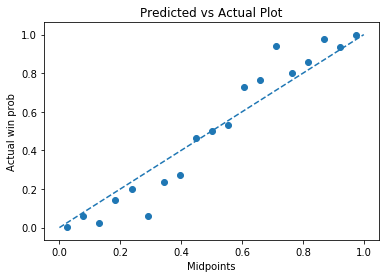

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(midpoints, fraction_outcome.values)
plt.title('Predicted vs Actual Plot')
plt.xlabel('Midpoints')
plt.ylabel('Actual win prob')
plt.plot([0,1], [0,1], '--')

### Question 5: adding error bars

If you did things correctly, it should look like fivethirtyeight has done "pretty" well with their forecasts: the actual fraction of wins tracks closely with the predicted number.  But how do we decide what's "good enough"? Consider this example: I correctly predict that a coin is fair (e.g. that it has a 50% chance of heads, 50% chance of tails).  But if I flip it 100 times, I can be pretty sure it won't come up heads exactly 50 times.  The fact that it didn't come up heads exactly 50 times doesn't make my prediction incorrect.

To assess how reasonable the predictions are, I need to quantify the uncertainty in my estimate.  It's reasonable to assume that within each bin, $k$, the observed number of wins, $Y_k \sim Bin(n_k, p_k)$, where $n_k$ is the number of elections and $p_k$ is the predicted win probability in bin $k$.

Classical results tell us that the obseved fraction of wins in bin $k$, $\hat p = \frac{Y_k}{n_k}$ has variance Var$\left(\hat p_k\right) = \frac{p_k (1-p_k)}{n_k} \approx \frac{\hat p_k(1- \hat p_k)}{n_k}$.  The standard deviation of the Binomial proportion then is $\hat \sigma_k \approx \sqrt{\frac{\hat p_k(1- \hat p_k)}{n_k}}$.  

If we use the [normal approximation to generate a confidence interval](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_approximation_interval), then the 95% interval has the form $\hat p_k \pm 1.96 \hat \sigma_k$.

Create a new "aggregated" dataframe.  This time, group `election_sub` by the `bin` and compute both the average of the `probwin_outcome` (`mean`) and the number of observations in each bin (`count`) using the `agg` function.  Call this new data frame, `election_agg`.

<!--
BEGIN QUESTION
name: q5a
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [97]:
election_agg = election_sub.groupby('bin')['probwin_outcome'].agg(['mean','count'])
election_agg

,mean,count
bin,,
"(0.0, 0.0526]",0.001715,583
"(0.0526, 0.105]",0.062500,32
"(0.105, 0.158]",0.023256,43
"(0.158, 0.211]",0.142857,28
"(0.211, 0.263]",0.200000,30
"(0.263, 0.316]",0.058824,17
"(0.316, 0.368]",0.235294,17
"(0.368, 0.421]",0.272727,22
"(0.421, 0.474]",0.466667,15


Use the `mean` and `count` columns of `election_agg` to create a new column of `election_agg` titled `err`, which stores $1.96 \times \hat \sigma_k$ in each bin $k$.

<!--
BEGIN QUESTION
name: q5b
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [98]:
#election_agg['count']
var = (election_agg['mean']*(1-election_agg['mean']))/election_agg['count']
error = (var**0.5)*1.96
election_agg['err'] = error
election_agg

,mean,count,err
bin,,,
"(0.0, 0.0526]",0.001715,583,0.003359
"(0.0526, 0.105]",0.062500,32,0.083870
"(0.105, 0.158]",0.023256,43,0.045048
"(0.158, 0.211]",0.142857,28,0.129615
"(0.211, 0.263]",0.200000,30,0.143138
"(0.263, 0.316]",0.058824,17,0.111852
"(0.316, 0.368]",0.235294,17,0.201644
"(0.368, 0.421]",0.272727,22,0.186105
"(0.421, 0.474]",0.466667,15,0.252472


Use `plt.errorbar` to create a new plot with error bars associated with the actual fraction of wins in each bin.  Again add a dashed y=x line.  Set the argument `fmt='.'` to create a scatterplot with errorbars.

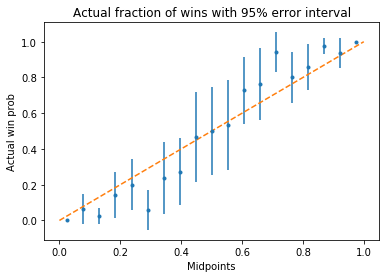

In [99]:
plt.errorbar(midpoints, election_agg['mean'].values, yerr=election_agg['err'].values, fmt='.')

plt.title('Actual fraction of wins with 95% error interval')
plt.xlabel('Midpoints')
plt.ylabel('Actual win prob')

plt.plot([0, 1], [0, 1], '--')

### Question 6: computing the coverage

If our intervals were true 95% confidence intervals, then we would expect about 95% of them to cover the midpoint of the bin (i.e. overlap with the y=x line).  What fraction of the 95% confidence intervals cover the bin midpoint?  Create a list called `upper` to be the `mean` + `err` and another `lower` to be `mean` - `err`.  Next, compute `frac_covering` as the fraction of midpoints between `lower` and `upper`. 

<!--
BEGIN QUESTION
name: q6
manual: false
points: 2
-->

In [100]:
upper = election_agg['mean'] + election_agg['err']

lower = election_agg['mean'] - election_agg['err']

frac_covering = ((midpoints < upper) & (midpoints > lower))
#np.sum(frac_covering)
#len(frac_covering)
frac_covering = np.sum(frac_covering)/len(frac_covering)
frac_covering

0.6842105263157895

In [101]:
ok.grade("q6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



### Question 7: understanding confidence intervals

<!--
BEGIN QUESTION
name: q7
manual: true
points: 2
-->

Are the 95% confidence intervals generally larger or smaller for more confident predictions (e.g. the predictions closer to 0 or 1).  What are the factors that determine the length of the confidence intervals?
<!-- EXPORT TO PDF -->

**SOLUTION HERE**
Higher confidence indicates a larger interval, since you are more confident that the true value will fall between a larger range. Sample size is one big factor that can determine the length of the confidence intervals as well as overall standard error, i.e. the variance. A smaller sample size would give you a larger interval.

### Question 8: finding the candidate that had the biggest change in support

Let's see if we can find the candidate that seemed to improve their standing the most between  August 11 and November 6.  First, fill in the function `abs_diff`, which takes in a pandas data frame and computes the difference between the largest values of `probwin` and the smallest value.  

<!--
BEGIN QUESTION
name: q8a
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [102]:
# Input: a pandas dataframe with a numeric column named `probwin`
# Output: a pandas dataframe with the same columns, with an additional column named `absdiff`
def abs_diff(x):
    x['absdiff'] = max(x['probwin']) - min(x['probwin'])
    return x

We can use this function to compute the difference between the maximum and minimum predicted with probabilities for every candidate.  To do so, group `election_sub` by `candidate` and `apply` the function `abs_diff`.  Find the index of the largest difference in `diff_dataframe` and store it in `max_idx`.  Do this using `np.nanargmax` function.  This function finds the _index_ of the largest value, ignoring any missing values (`nans`). 

<!--
BEGIN QUESTION
name: q8b
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [103]:
diff_dataframe =election_sub.groupby('candidate').apply(abs_diff)
diff_dataframe
max_idx = np.nanargmax(diff_dataframe['absdiff'])
#diff_dataframe.iloc[max_idx]

<!--
BEGIN QUESTION
name: q8c
manual: false
points: 2
-->

In [104]:
candidate = diff_dataframe.iloc[max_idx]['candidate']
candidate


'Sharice Davids'

In [105]:
ok.grade("q8c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Did the candidate win or lose the election?
<!--
BEGIN QUESTION
name: q8d
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [106]:
election_sub[(election_sub.candidate == 'Sharice Davids')]

,year,office,state,district,special,election_date,forecast_date,forecast_type,party,candidate,projected_voteshare,actual_voteshare,probwin,probwin_outcome,bin
1890,2018,House,KS,3.0,False,2018-11-06,2018-11-06,classic,D,Sharice Davids,51.85115,NaN,0.84994,1,"(0.842, 0.895]"
252855,2018,House,KS,3.0,False,2018-11-06,2018-08-11,classic,D,Sharice Davids,44.84660,NaN,0.19566,1,"(0.158, 0.211]"


**Solution Here**
Looking above, she won the election, giving by the probwin_outcome being 1.

### Question 9: plot predictions over time

Plot the forecasted win probability for the candidate you found above, for every available date.  For this you'll need to return to working with the full `election_data`, not `election_sub`.  Don't forget, you should still filter to `classic` forecasts only.  First, create an array of `predicted_probs` for the candidate at every date.  Also save the date in an array called `forecast_date`.  When creating `forecast_date`, use `pd.to_datetime` to convert a `str` datatype to the date format that can easily be plotted.

<!--
BEGIN QUESTION
name: q9a
manual: false
points: 2
-->

In [107]:
election_data1 = election_data[(election_data.candidate == 'Sharice Davids') & (election_data.forecast_type=="classic")]
predicted_probs = election_data1[['forecast_date','probwin']]
forecast_date = pd.to_datetime(election_data1['forecast_date'].values)


In [108]:
ok.grade("q9a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now create a lineplot with forecast date on the x-axis and the predicted win probability on the y-axis.
<!--
BEGIN QUESTION
name: q9b
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Predicted win probability')

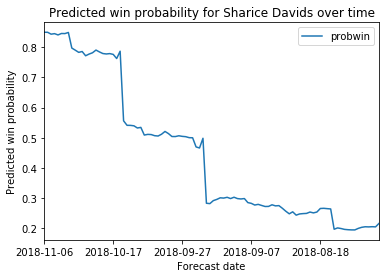

In [109]:
predicted_probs.plot.line(x='forecast_date', y='probwin')
plt.title('Predicted win probability for Sharice Davids over time')
plt.xlabel('Forecast date')
plt.ylabel('Predicted win probability')


### Question 10: prediction histograms

<!--
BEGIN QUESTION
name: q10a
manual: true
points: 2
-->

Make a histogram showing the predicted win probabilities on the morning of the election.  Again, restrict yourself to only the `classic` predictions.
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Frequency')

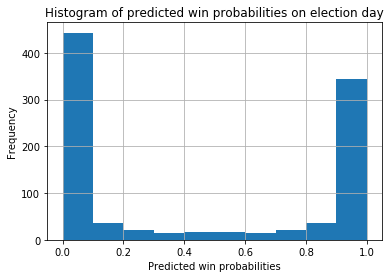

In [110]:
electionplot = election_data[(election_data.forecast_type=="classic") & (election_data.forecast_date =='2018-11-06')]
electionplot['probwin'].hist()
plt.title('Histogram of predicted win probabilities on election day')
plt.xlabel('Predicted win probabilities')
plt.ylabel('Frequency')

<!--
BEGIN QUESTION
name: q10b
manual: true
points: 2
-->

Are most house elections easy to forecast or hard to forecast?
<!-- EXPORT TO PDF -->

**SOLUTION HERE**
House elections are easy to forecast because there is not a lot of randomness associated with predicting them, as it can be said that most incumbents will most likely vote to keep their seat. Given other situations, predicted house elections does not possess as much randomness as would be thought, as there is a better sense of what affects outcomes.

### Question 11: Comparing election and baseball predictions

Fivethirtyeight also builds predictive models for sporting events.  The following code will down a csv file containg their predictions for who would win every major league baseball game over the past two years.

In [111]:
!wget https://raw.githubusercontent.com/fivethirtyeight/checking-our-work-data/master/mlb_games.csv    

--2019-04-20 22:04:47--  https://raw.githubusercontent.com/fivethirtyeight/checking-our-work-data/master/mlb_games.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 562029 (549K) [text/plain]
Saving to: ‘mlb_games.csv.3’

mlb_games.csv.3     100%[===================>] 548.86K  --.-KB/s    in 0.04s   

2019-04-20 22:04:47 (14.6 MB/s) - ‘mlb_games.csv.3’ saved [562029/562029]



<!--
BEGIN QUESTION
name: q11a
manual: true
points: 2
-->

Create a pandas dataframe from the csv and print the first 10 rows.
<!-- EXPORT TO PDF -->

In [112]:
baseball_data = pd.read_csv("mlb_games.csv")
baseball_data.head(10)

,season,date,team1,team2,dh,prob1,prob1_outcome,prob2,prob2_outcome
0,2018,2018-10-28,Dodgers,Red Sox,0,0.483877,0.0,0.516123,1.0
1,2018,2018-10-27,Dodgers,Red Sox,0,0.508342,0.0,0.491658,1.0
2,2018,2018-10-26,Dodgers,Red Sox,0,0.555907,1.0,0.444093,0.0
3,2018,2018-10-24,Red Sox,Dodgers,0,0.619808,1.0,0.380192,0.0
4,2018,2018-10-23,Red Sox,Dodgers,0,0.648954,1.0,0.351046,0.0
5,2018,2018-10-20,Brewers,Dodgers,0,0.509500,0.0,0.490500,1.0
6,2018,2018-10-19,Brewers,Dodgers,0,0.505211,1.0,0.494789,0.0
7,2018,2018-10-18,Astros,Red Sox,0,0.603029,0.0,0.396971,1.0
8,2018,2018-10-17,Astros,Red Sox,0,0.568016,0.0,0.431984,1.0
9,2018,2018-10-17,Dodgers,Brewers,0,0.600428,1.0,0.399572,0.0


In this dataframe `prob1` is the predicted win probability for `team1`.  Make a histogram of `prob1`.  Set the limits of the x-axis to `[0, 1]`
<!--
BEGIN QUESTION
name: q11b
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Frequency')

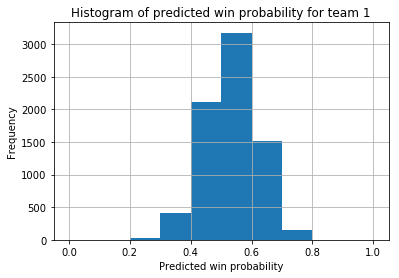

In [113]:
baseball_data['prob1'].hist(range = [0,1])
plt.title('Histogram of predicted win probability for team 1')
plt.xlabel('Predicted win probability')
plt.ylabel('Frequency')

### Question 12

<!--
BEGIN QUESTION
name: q12
manual: true
points: 2
-->

Find the most "surprising" baseball game outcome.  To do so, select all of the entries for which `prob1_outcome` is 1 (i.e. `team1` won the game), and then look for the index of the row containing the smallest value of `prob1`.  This will correspond to the game that was most suprising according to fivethirtyeights predictions. Find and print the row corresponding to this most surprising outcome.
<!-- EXPORT TO PDF -->

In [114]:
base = baseball_data[(baseball_data.prob1_outcome==1)]
base[(base.prob1 == base['prob1'].min())]
#Royals had 28.7% chance of winning, and they did win.

,season,date,team1,team2,dh,prob1,prob1_outcome,prob2,prob2_outcome
521,2018,2018-08-25,Royals,Indians,0,0.287558,1.0,0.712442,0.0


### Question 13

<!--
BEGIN QUESTION
name: q13
manual: true
points: 2
-->

Are the outcomes of baseball games generally easier or harder to predict than the outcomes of political elections?  In a few sentences, comment on why this might be the case.  What data is available for these predictions? What factors affect the outcomes of elections and baseball games? What makes an event like an election or a baseballgame "random"?
<!-- EXPORT TO PDF -->

**SOLUTION HERE**
Baseball games outcomes are generally harder to predict than political elections. There is more randomness involved with baseball games, as in, not everything in baseball games are clearly predicted and defined. For example, there are many factors in a baseball game that can affect the outcome, i.e. the players playing in that specific game, stamina, etc. Therefore, in order to better predict baseball games, you would need more data than just probability of that team winning. These are also the events that make an election or a baseball game random, because we cannot thoroughly predict and account for these factors.

### Question 14 (PSTAT 234)

**(Question 5 revisited)** In Question 5, error bars were calculated by assuming that election outcomes are Binomial random variables.

On the other hand, if we do not have a good distributional about the election outcomes, we can estimate the error bars from resampling the data.

Write a function named `bootstrap_data_means` that can take a data frame, say `data_in`, as input. Suppose `data_in` has `n` rows. Inside `bootstrap_data_means` function, you will

1. Select `n`-rows of `data_in` at random with replacement, creating a pseudo-dataset
1. For each bin, compute probabilities of success for each pseudo-dataset as you have done on Question 5
1. Return the computed probabilities

<!--
BEGIN QUESTION
name: q14a
manual: false
points: 2
-->

Then, run `bootstrap_data_means` function 100 times, and create a data frame `bootstrap_election_100_agg`:

In [115]:
def bootstrap_data_means(data_in):
    
    from numpy.random import choice
    
    n = len(data_in)
    
    # randomly sample row indices with replacement
    indx = choice(range(0,n), n, replace = True )
    # compute probabilities of success
    bootstrap_means = data_in.iloc[indx].groupby('bin')['probwin_outcome'].agg(['mean'])
    
    return(bootstrap_means)

bootstrap_election_100_agg = ...

In [116]:
ok.grade("q14a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q14a > Suite 1 > Case 1

>>> 
>>> len(bootstrap_data_means(election_sub))
TypeError: object of type 'ellipsis' has no len()

# Error: expected
#     19
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: object of type 'ellipsis' has no len()

Run only this test case with "python3 ok -q q14a --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



By now, we have a distribution of success probabilities saved in `bootstrap_election_agg`. We can compute empirical error bars from 2.5% and 97.5% quantiles. Write function named `bootstrap_error_bars` that can be used to calculate the following columns:
1. `mean`: mean of probabilities of success
1. `err_low`: low point of the error bars
1. `err_high`: high point of the error bars

<!--
BEGIN QUESTION
name: q14b
manual: false
points: 2
-->
Funtion `bootstrap_error_bars` is to be called by using `bootstrap_election_100_agg.apply(bootstrap_error_bars, ...)`.

In [117]:
def bootstrap_error_bars(x):
    ...
    
bootstrap_election_agg = ...

In [118]:
ok.grade("q14b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q14b > Suite 1 > Case 1

>>> 
>>> all(bootstrap_election_agg.columns == ['mean', 'err_low', 'err_high'])
AttributeError: 'ellipsis' object has no attribute 'columns'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     AttributeError: 'ellipsis' object has no attribute 'columns'

Run only this test case with "python3 ok -q q14b --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



Recall the figure from Question 5. In addition, draw a horizontal lines at 0 and 1.

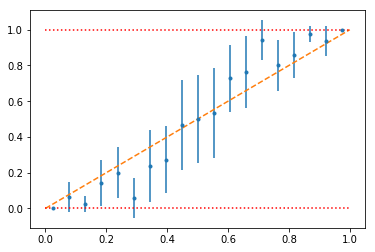

In [119]:
plt.errorbar(midpoints, election_agg['mean'].values, yerr=election_agg['err'].values, fmt='.')
plt.plot([0, 1], [0, 1], '--')
plt.plot([0, 1], [1, 1], ':r')
plt.plot([0, 1], [0, 0], ':r')

<!--
BEGIN QUESTION
name: q14c
manual: true
points: 2
-->
Create an analogous plot for empirical error bars with `bootstrap_election_agg`. Also draw a horizontal lines at 0 and 1.
<!-- EXPORT TO PDF -->

**SOLUTION HERE**

In [120]:
# Create a similar figure using empirical error bars  
...

<!--
BEGIN QUESTION
name: q14d
manual: true
points: 2
-->
Compare the two error bar plots and explain.
<!-- EXPORT TO PDF -->

**SOLUTION HERE**

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 16 EXPORTED QUESTIONS -->

In [121]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('homework1.ipynb', 'homework1.pdf')
ok.submit()

Generating PDF...


/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsu

/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsu

Saved homework1.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'homework1.ipynb'.
Performing authentication
Please enter your bCourses email: d_chu@ucsb.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: vdTShtE2QdsTWWdjfyo20e0bKhCmdU
Successfully logged in as d_chu@ucsb.edu
Submit... 100% complete
Submission successful for user: d_chu@ucsb.edu
URL: https://okpy.org/ucsb/pstat134234/sp19/homework1/submissions/K1BNYr

